In [125]:
from sklearn import datasets
import pandas as pd
import numpy as np

In [126]:
data = pd.read_csv('./Mall_Customers.csv')

In [127]:
data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [128]:
# CustomerID는 단순 번호이므로 데이터셋에서 제외함.
data.drop("CustomerID",axis=1, inplace = True)

In [129]:
# 지정하기 쉽게 열 이름 변경
data = data.rename(columns = {'Annual Income (k$)': 'AnnualIncome', 
                              'Spending Score (1-100)':'SpendingScore'})

In [130]:
# gender 인코딩 (남성 0, 여성 1)
data["Gender"] = data['Gender'].map( {'Male':0, 'Female':1})
data.head(5)

,Gender,Age,AnnualIncome,SpendingScore
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [131]:
# 피처만 변수에 저장
feature = data[ ["Age", "AnnualIncome", "SpendingScore"]]
feature.head()

,Age,AnnualIncome,SpendingScore
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [132]:
# 스케일링
from sklearn.preprocessing import StandardScaler
feature = StandardScaler().fit_transform(feature)
feature = pd.DataFrame(feature, columns=["Age", "AnnualIncome", "SpendingScore"])
feature.head(5)

C:\Users\john\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\john\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Age,AnnualIncome,SpendingScore
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


### K-means

In [133]:
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
import seaborn as sns

In [134]:
#K-Means 군집 분석 
model = KMeans(n_clusters=2,algorithm='auto')
model.fit(feature)
predict = pd.DataFrame(model.predict(feature))
predict.columns=['predict']

# predict 추가 
r = pd.concat([feature,predict],axis=1)

print(r[0:20])

         Age  AnnualIncome  SpendingScore  predict
0  -1.424569     -1.738999      -0.434801        1
1  -1.281035     -1.738999       1.195704        1
2  -1.352802     -1.700830      -1.715913        0
3  -1.137502     -1.700830       1.040418        1
4  -0.563369     -1.662660      -0.395980        1
5  -1.209269     -1.662660       1.001596        1
6  -0.276302     -1.624491      -1.715913        0
7  -1.137502     -1.624491       1.700384        1
8   1.804932     -1.586321      -1.832378        0
9  -0.635135     -1.586321       0.846310        1
10  2.020232     -1.586321      -1.405340        0
11 -0.276302     -1.586321       1.894492        1
12  1.374332     -1.548152      -1.366519        0
13 -1.065735     -1.548152       1.040418        1
14 -0.132768     -1.548152      -1.444162        0
15 -1.209269     -1.548152       1.118061        1
16 -0.276302     -1.509983      -0.590088        0
17 -1.352802     -1.509983       0.613381        1
18  0.943732     -1.433644     

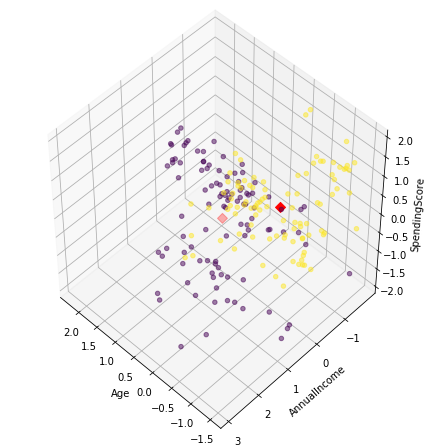

In [135]:
# 각 군집의 중심점 
centers = pd.DataFrame(model.cluster_centers_,columns=["Age", "AnnualIncome", "SpendingScore"])
center_x = centers['Age']
center_y = centers['AnnualIncome']
center_z = centers['SpendingScore']

from mpl_toolkits.mplot3d import Axes3D
# scatter plot
fig = plt.figure( figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(r['Age'],r['AnnualIncome'],r['SpendingScore'],c=r['predict'],alpha=0.5)
ax.scatter(center_x,center_y,center_z,s=50,marker='D',c='r')
ax.set_xlabel('Age')
ax.set_ylabel('AnnualIncome')
ax.set_zlabel('SpendingScore')
plt.show()

In [136]:
#각 군집별 갯수 확인 
ct = pd.crosstab(data['Gender'],r['predict'])
print (ct)
# 주어진 특성을 기반으로 성별 분류를 잘 해냈다고 보기는 어렵다. 
# 성별에 따른 쇼핑 특성 차이는 유의미하게 있지는 않은 듯 하다.

predict   0   1
Gender         
0        48  40
1        55  57


### DB-SCAN

k-means와 달리 클러스터의 수를 정하지 않아도 되고, 클러스터의 밀도에 따라 연결하여 기하학적인 모양을 가지는 군집을 잘 찾을 수 있음.

In [137]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot  as plt
import seaborn as sns

In [138]:
model = DBSCAN(eps=0.5,min_samples=4)

predict = pd.DataFrame(model.fit_predict(feature))
predict.columns=['group']

r = pd.concat([feature,predict],axis=1)

print(r[0:20])

         Age  AnnualIncome  SpendingScore  group
0  -1.424569     -1.738999      -0.434801     -1
1  -1.281035     -1.738999       1.195704      0
2  -1.352802     -1.700830      -1.715913     -1
3  -1.137502     -1.700830       1.040418      0
4  -0.563369     -1.662660      -0.395980      1
5  -1.209269     -1.662660       1.001596      0
6  -0.276302     -1.624491      -1.715913     -1
7  -1.137502     -1.624491       1.700384     -1
8   1.804932     -1.586321      -1.832378     -1
9  -0.635135     -1.586321       0.846310      0
10  2.020232     -1.586321      -1.405340     -1
11 -0.276302     -1.586321       1.894492     -1
12  1.374332     -1.548152      -1.366519      2
13 -1.065735     -1.548152       1.040418      0
14 -0.132768     -1.548152      -1.444162     -1
15 -1.209269     -1.548152       1.118061      0
16 -0.276302     -1.509983      -0.590088      1
17 -1.352802     -1.509983       0.613381      0
18  0.943732     -1.433644      -0.823017     -1
19 -0.276302     -1.

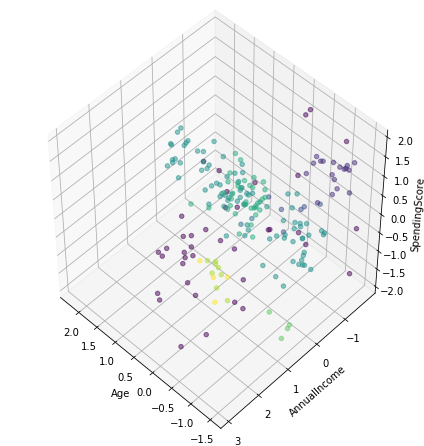

In [139]:
from mpl_toolkits.mplot3d import Axes3D
# scatter plot
fig = plt.figure( figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(r['Age'],r['AnnualIncome'],r['SpendingScore'],c=r['group'],alpha=0.5)
ax.set_xlabel('Age')
ax.set_ylabel('AnnualIncome')
ax.set_zlabel('SpendingScore')
plt.show()

In [140]:
#교차분석 결과 확인 
ct = pd.crosstab(data['Gender'],r['group'])
print (ct)
# 마찬가지로 성별은 영향이 없어 보임.

group   -1   0   1   2   3   4   5   6   7
Gender                                    
0       20   8   1   1  34  15   4   5   0
1       19  10   5   3  49  19   0   3   4
